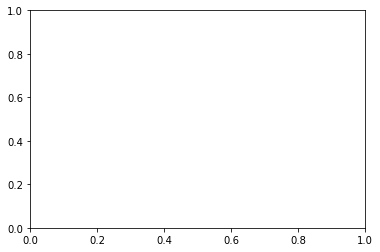

In [1]:
# pip install snowflake-connector-python
# pip install --upgrade snowflake-sqlalchemy
# pip install "snowflake-connector-python[pandas]"
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser
from sqlalchemy import create_engine
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format
plt.ticklabel_format(style='plain');

In [2]:
config = configparser.ConfigParser()
config.read(r'C:\Users\mairag0502\config.ini')
user = config['sf_login']['user']
pswd = config['sf_login']['pswd']

In [3]:
con = snowflake.connector.connect(
    user=user,
    password=pswd,
    account='plutotv_prod.us-east-1',

    database='SANDBOX',
    schema='ANALYSIS_PRODUCT'
)

In [6]:
query = """

select
    a.client_id,
    a.session_id,
    a.channel_id,
    a.event_name,
    a.label
from 
    "SANDBOX"."ENGINEERING"."UX_EVENT_FACT_US3" a
join
    odin_prd.dw_odin.app_dim c on a.app_sid = c.app_sid
where 
    date_trunc('month',a.event_occurred_utc) between '2022-04-01' and '2022-04-30'
    and c.app_name = 'roku'
    and event_name = 'channelChange'
group by 
    1,2,3,4,5

                """
# select * from COHORT_WEEKLY_TBL_GM_101822
# select * from ROKU_NEWUSERSAUG_M1_TVM_GM_101322
CSV_File_prefix = 'roku_flows_tbl_'

In [7]:
# data from snowflake
chunks = []
for chunk in pd.read_sql_query(query, con, chunksize=2_000_000):
    print(f"Working on chunk #{len(chunks)+1}", end='\r')
    chunks.append(chunk)
#     chunk.to_csv(f"{CSV_File_prefix}{len(chunks)}.csv", index=False, header=True)
df = pd.concat(chunks)

# return df

OperationalError: 255005: Failed to read next arrow batch: b''

In [ ]:
df.head()

In [ ]:
query2 = """

select
    client_id,
    "SEGMENT K-MEANS PCA 6"
from 
    "SANDBOX"."ANALYSIS_PRODUCT"."SEGMENTATION_1_DATA_GT_080122"

                """

In [ ]:
# data from snowflake
chunks = []
for chunk in pd.read_sql_query(query2, con, chunksize=2_000_000):
    print(f"Working on chunk #{len(chunks)+1}", end='\r')
    chunks.append(chunk)
#     chunk.to_csv(f"{CSV_File_prefix}{len(chunks)}.csv", index=False, header=True)
df2 = pd.concat(chunks)


In [ ]:
out = roku.groupby('test_vod')['test_vod'].count()
ax = out.plot.bar(rot=0, color='b', figsize=(16,4))
plt.show()